## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [734]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [735]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [736]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


c. The number of unique users in the dataset.

In [737]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [738]:
## Setting min to 0 so I can define all of the values in the converted column as greater than 1. I don't want to
## just search for conversions = 1 as I'm not sure if this database contains single users that converted more than 
## one time 

minimum = 0
user_id = df['user_id'].nunique()
converted = 'converted'
column = df[converted]

count_conv = column[column > minimum].count()

users_conv = count_conv
print(users_conv)

35237


In [739]:
proportion_converted = users_conv * 100 / 294478
print(proportion_converted)


11.965919355605513


e. The number of times the `new_page` and `treatment` don't line up.

In [740]:
df_mismatch1 = df.loc[(df['group'] == 'control') & (df['landing_page'] == 'new_page')]
df_mismatch2 = df.loc[(df['group'] == 'treatment') & (df['landing_page'] == 'old_page')]
df_mismatchtotal = df_mismatch1+ df_mismatch2
df_mismatch1.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [741]:
df_mismatch2.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [742]:
df_mismatch = [df_mismatch1, df_mismatch2]
mismatch = pd.concat(df_mismatch)
mismatch.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [743]:
## According to the results from df.info() all of the 294478 entries are accounted for in each column, so there
## are no missing values.

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [744]:
df2 = df
df2['mismatch1'] = df['group'].eq('control') & df['landing_page'].eq('new_page')
df2['mismatch2'] = df['group'].eq('treatment') & df['landing_page'].eq('old_page')
df2 = df2[df2['mismatch1'] == False]
df2 = df2[df2['mismatch2'] == False]

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
 5   mismatch1     290585 non-null  bool  
 6   mismatch2     290585 non-null  bool  
dtypes: bool(2), int64(2), object(3)
memory usage: 13.9+ MB


In [745]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [746]:
# Drop the mismatch columns to improve readability of dataframe
df2 = df2.drop(columns=['mismatch1', 'mismatch2'])

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [747]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [748]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [749]:
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [750]:
df2 = df2.drop(2893)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [751]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [752]:
df_controlcon = df2[df2['group'] == 'control']['converted']
df_controlcon.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [753]:
df_treatmentcon = df2[df2['group'] == 'treatment']['converted']
df_treatmentcon.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [754]:
len(df2.query('landing_page=="new_page"'))/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Considering the evidence from the above questions alone, there is not enough evidence to dictate which ultimately receives a higher conversion rate as the new page treatment group led to roughly the same amount of conversions receiving a 12.04% conversion rate as compared to 11.89% conversion rate of users that received the old page. While there may be a difference in a few hundred customers between the two - that isn't a strong enough indicator in a dataset this large. There needs to be further A/B testing analysis done to determine which variables lead to to higher conversions**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}:P_{new}<=P_{old}$
             
$H_{1}:P_{new}>P_{old}$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [755]:
pnew_conv = df2['converted'].mean()
pnew_conv

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [756]:
pold_conv = df2['converted'].mean()
pold_conv

0.11959708724499628

c. What is $n_{new}$?

In [757]:
n_new = df2[df2['landing_page'] == 'new_page']
n_new.shape[0]

145310

d. What is $n_{old}$?

In [758]:
n_old = df2[df2['landing_page'] == 'old_page']
n_old.shape[0]

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [759]:
treatment = df2[df2['group'] == 'treatment'].shape[0]
new_page_converted = np.random.choice([1,0], treatment, replace=True, p=[(1-pnew_conv), pnew_conv])
treatment

145310

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [760]:
control = df2[df2['group'] == 'control'].shape[0]
old_page_converted = np.random.choice([1,0], control, replace = True, p=[(1-pold_conv), pold_conv])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [761]:
new_page_converted.mean() - old_page_converted.mean()

0.0028585355721161276

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [762]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1,0], treatment, replace = True, p=[(1-pnew_conv), pnew_conv])
    old_page_converted = np.random.choice([1,0], control, replace = True, p=[(1-pold_conv), pold_conv])
    np_mean = new_page_converted.sum() / len(new_page_converted)
    op_mean = old_page_converted.sum() / len(old_page_converted)
    p_diffs.append(np_mean - op_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([  43.,  227.,  803., 1816., 2678., 2439., 1401.,  479.,   99.,
          15.]),
 array([-0.00408631, -0.00323699, -0.00238767, -0.00153835, -0.00068903,
         0.00016029,  0.00100961,  0.00185893,  0.00270824,  0.00355756,
         0.00440688]),
 <BarContainer object of 10 artists>)

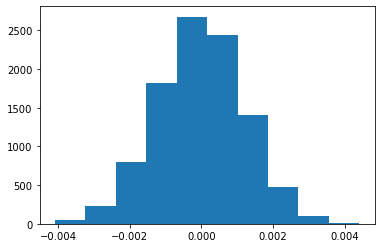

In [763]:
plt.hist(p_diffs)

In [764]:
# The mean is still roughly around 0 which is what I expected considering I didn't think there would be much of 
# an increase in the conversion rate from the old page to the new page.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

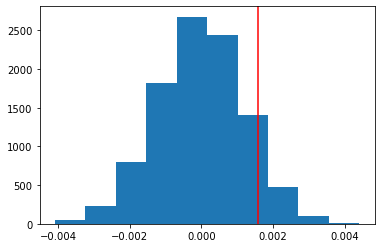

In [778]:
plt.hist(p_diffs)
ob_diff = df_controlcon.mean() - df_treatmentcon.mean()
plt.axvline(x= ob_diff, color='r');
plt.show()

In [781]:
landing_new = df2[df2['landing_page'] == 'new_page'].sum()
landing_old = df2[df2['landing_page'] == 'old_page'].sum()
new_conv = landing_new['converted']
old_conv = landing_old['converted']
ob_diff = new_conv - old_conv
p_val = (np.array(p_diffs) > actual_diff).mean()
p_val

0.8988

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value calculated here is the P-value, which in this scenario is used to determine the probability of observing an extreme enough increase in a conversion rate taking place. Our value would have to be less than .05 to come to the conclusion that the null hypothesis is incorrect, as the null hypothesis states that the old page conversion rate remains either more than or equal to the new page conversion rate. According to the significantly large P-value this is true.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [782]:
import statsmodels.api as sm
df_treatment = df2[df2['group'] == 'treatment']
df_control = df2[df2['group'] == 'control']

convert_old = df_controlcon.sum()
convert_new = df_treatmentcon.sum()
n_old = df2.shape[0] - df_control.shape[0]
n_new = df_treatment.shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [783]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new])
print(z_score, p_value)

1.286299137965753 0.19833868323460735


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The results of the z-score and p-value indicate that we have clear reason to accept our null hypothesis as the new treatment page does not result in more conversions than the old control page in any significant way or at least remains fairly equal. Our P-value is roughly .1983 which is significantly higher than the 0.05 that would be required to stay under in order to reject our null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic regression would be the best approach because our main variable to focus on is conversion and it only has two listed outputs in this case.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [784]:
df2['intercept'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [785]:
import statsmodels.api as sm
df2['intercept'] = 1
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [786]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:               8.077e-06
Time:                        02:28:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value came out to be .190 which is the same as it was in part II. This means that the same null hypothesis from Part II is still correct.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It would be a good idea to include more factors such as what devices somebody was accessing the web page on like desktop or mobile, how long they were on the website, whether they were on wi-fi or using their mobile data, etc... however, with this dataset there was only one variable that is very broad and not quite enough for a legitimate A/B test that would produce valuable insights.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [787]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head(10)

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,1


In [792]:
### Create the necessary dummy variables
df_new[['US', 'UK']] = pd.get_dummies(df_new['country'])[['US', 'UK']]
df_new.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page,US,UK,CA
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [793]:
### Fit Your Linear Model And Obtain the Results
logit_mod2 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'US','UK']])
results_comp = logit_mod2.fit()
results_comp.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 08 Aug 2022   Pseudo R-squ.:               2.323e-05
Time:                        02:42:39   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

**According to the summary, the p-value does not indicate that there is an extreme enough difference between the conversion rate across the country variable to be a reliable hypothesis.**

<a id='conclusions'></a>
## Conclusions

In this dataset, we analyzed the results of a company split test to find out whether or not the new landing page on their website produced more conversions than their old landing page. 

The results of this analysis indicate a negligible difference in conversion rates among user interaction with the new web page in comparison to the old web page, with all factors resulting in over a 5% p-value - this indicates that there is not an extreme enough increase in conversion rates even when observed over sample sizes of 10,000 simulated user interactions based on current website interaction. There were also no significant differences when factoring in users from different countries.

If I were to advise this company on what possible action could be taken to narrow down key performance indicators that contribute to higher conversion rates, I would advise putting more effort into gathering more specific data points like what devices users are using to interact with the company's web pages on, demographic information of users, as well as the value of each conversion in order to identify any patterns that may contribute to who is buying the most product. 

Having more in depth data like this would allow for proper analysis of the demographics of users and the ability to segment users based on their affinity for the company if they had a data analyst observe and identify trends amongst a particular demographic that showed more interest in purchasing from their website. This type of insight would also help the company create more marketing materials, new products, and new landing pages as well.

